In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693438 sha256=2fe98d39dd844398acb72df05cc2f3d2f0482b966acc07ef9b2ed8a88a2f98fa
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


In [3]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import data
f = "/content/drive/My Drive/hour.csv"
df = h2o.import_file(f)

# Reponse column
y = "cnt"
#removing the columns instant as it is index, date, count of casual and registered.
x=df.columns
x.remove(y)
x.remove("instant")
x.remove("dteday")
x.remove("casual")
x.remove("registered")

# Split into train & test
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]



Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprjz_extd
  JVM stdout: /tmp/tmprjz_extd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprjz_extd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_jdo89g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(x=x,y=y, training_frame=train)



AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/8
# GBM base models (used / total),2/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_2_AutoML_1_20230315_111607,39.2696,1542.1,24.3506,nan,1542.1,838,0.044819,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230315_111607,39.3024,1544.68,24.2768,nan,1544.68,842,0.057487,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230315_111607,39.343,1547.87,24.3859,nan,1547.87,913,0.042758,StackedEnsemble
GBM_1_AutoML_1_20230315_111607,40.3008,1624.15,25.2768,nan,1624.15,3252,0.049029,GBM
XGBoost_1_AutoML_1_20230315_111607,42.8289,1834.32,27.3308,nan,1834.32,1879,0.006164,XGBoost
XGBoost_2_AutoML_1_20230315_111607,45.1063,2034.58,29.3287,nan,2034.58,471,0.002837,XGBoost
GBM_3_AutoML_1_20230315_111607,52.0455,2708.73,35.6151,0.602738,2708.73,442,0.007671,GBM
GBM_4_AutoML_1_20230315_111607,55.8704,3121.5,41.1054,0.80111,3121.5,381,0.006665,GBM
DRF_1_AutoML_1_20230315_111607,74.1484,5497.98,45.4695,0.498509,5497.98,400,0.000842,DRF
GBM_2_AutoML_1_20230315_111607,76.3936,5835.98,56.1108,0.904567,5835.98,253,0.004654,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

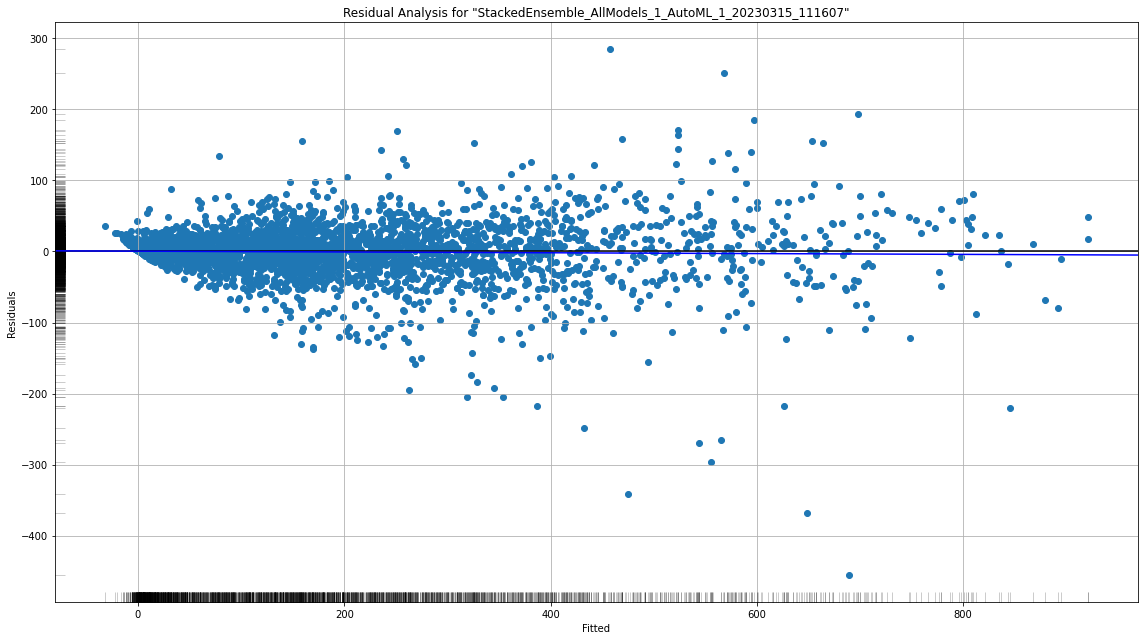

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

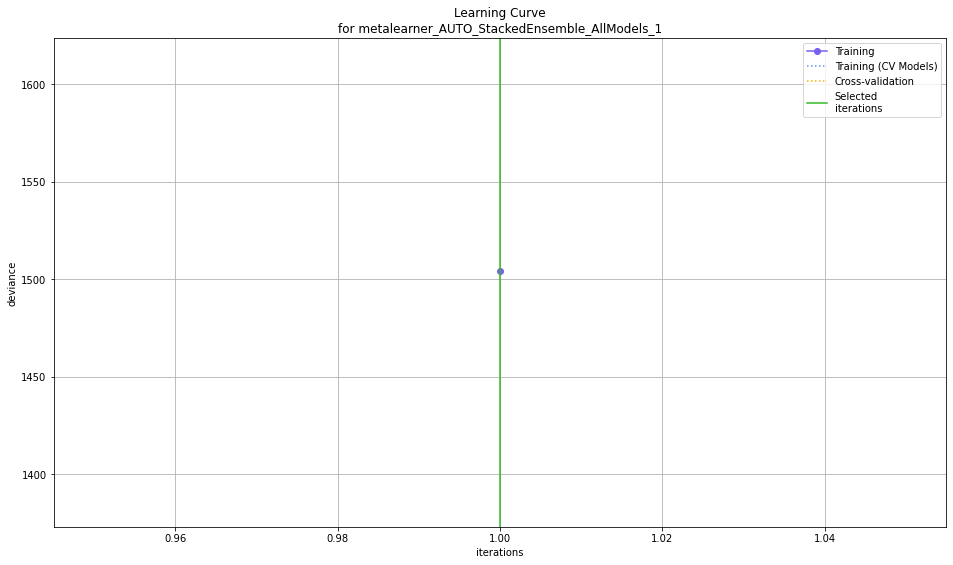

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

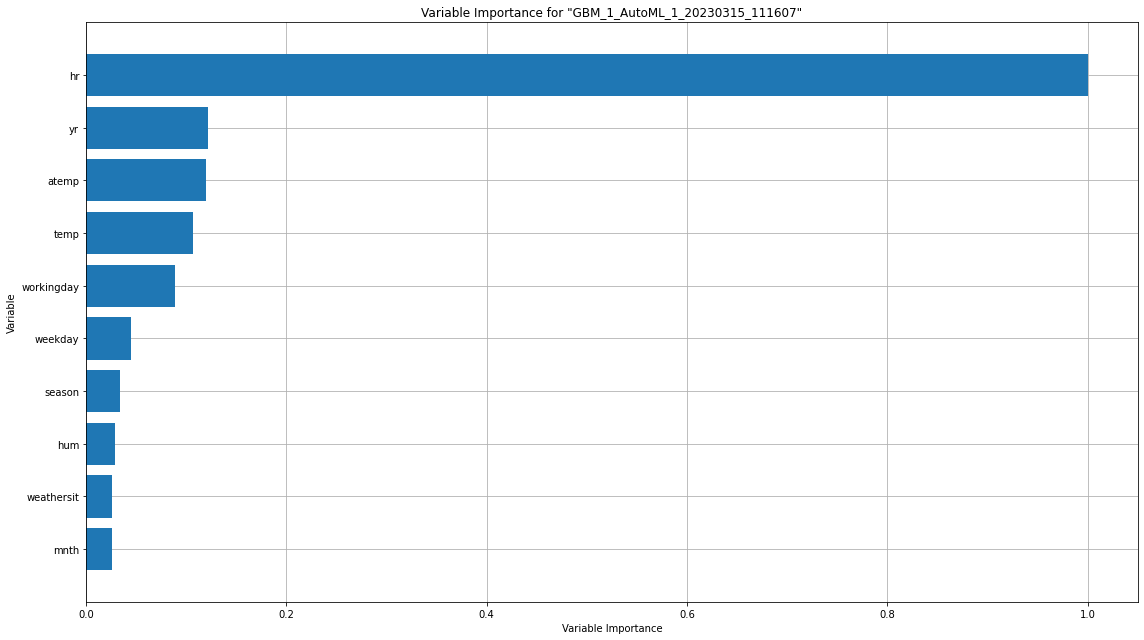

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

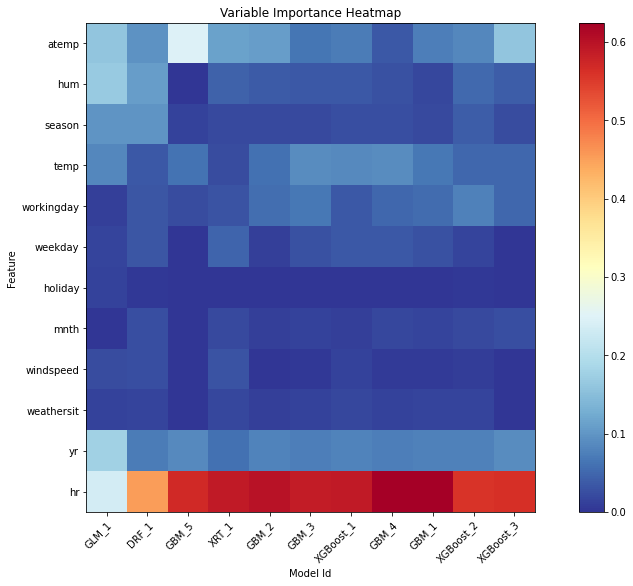

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

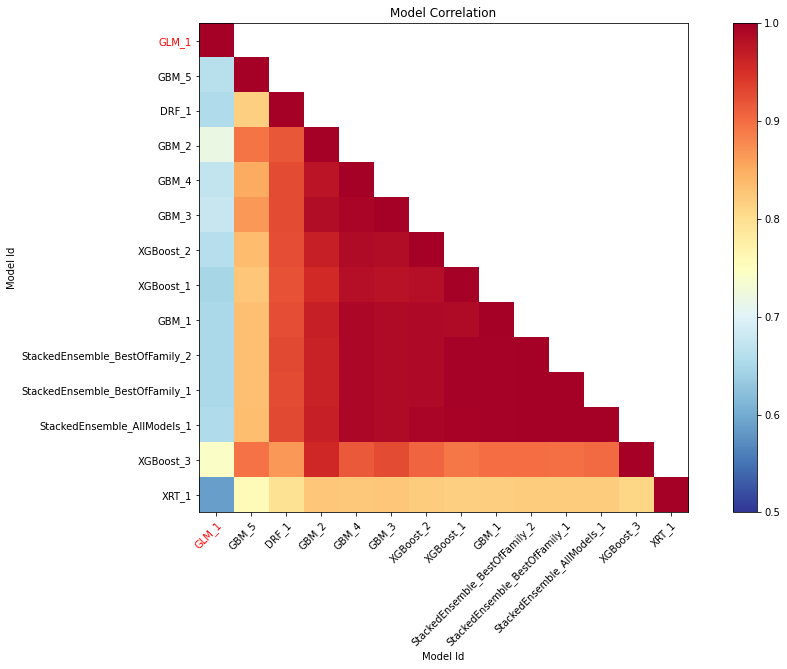

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

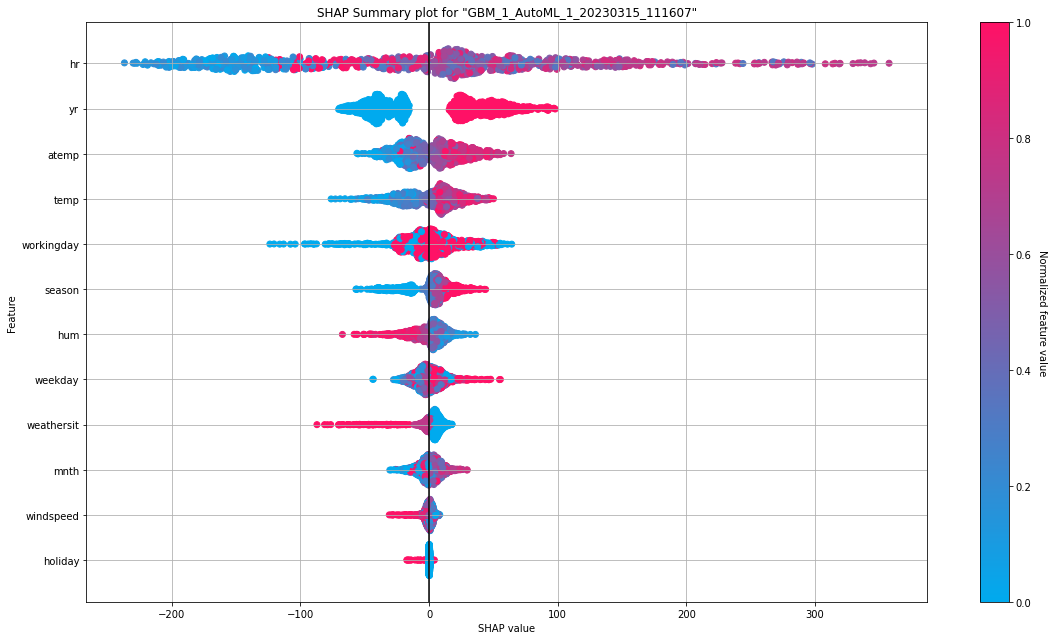

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

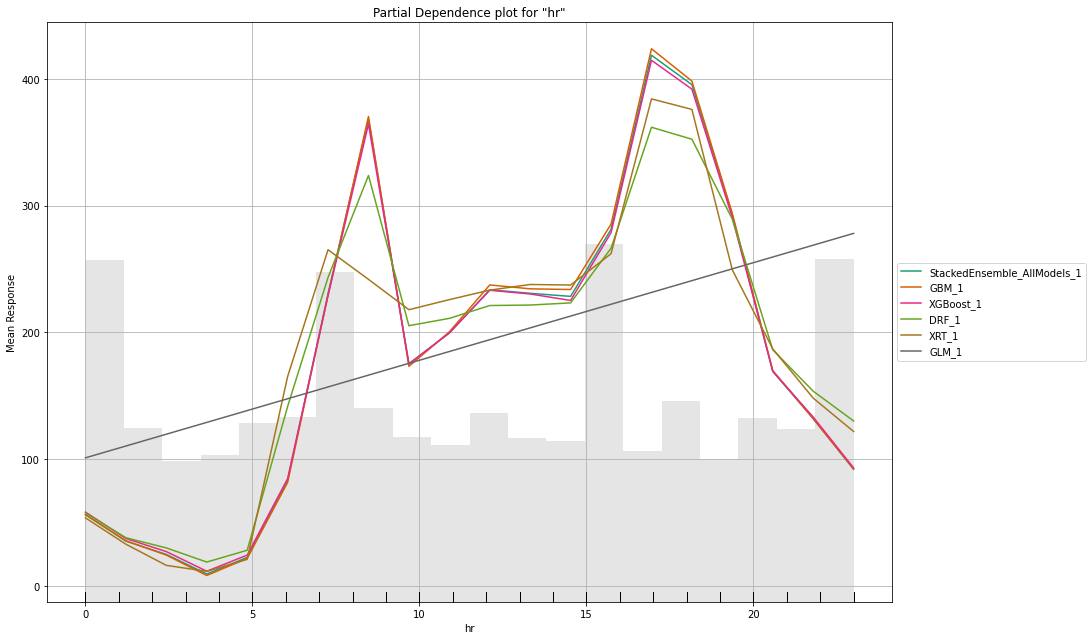

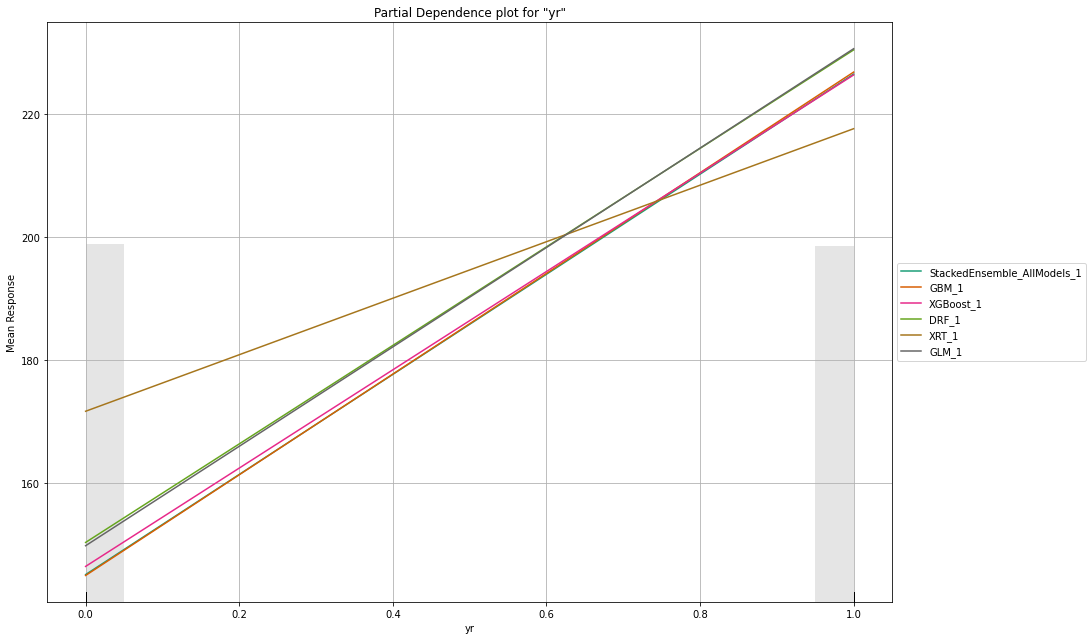

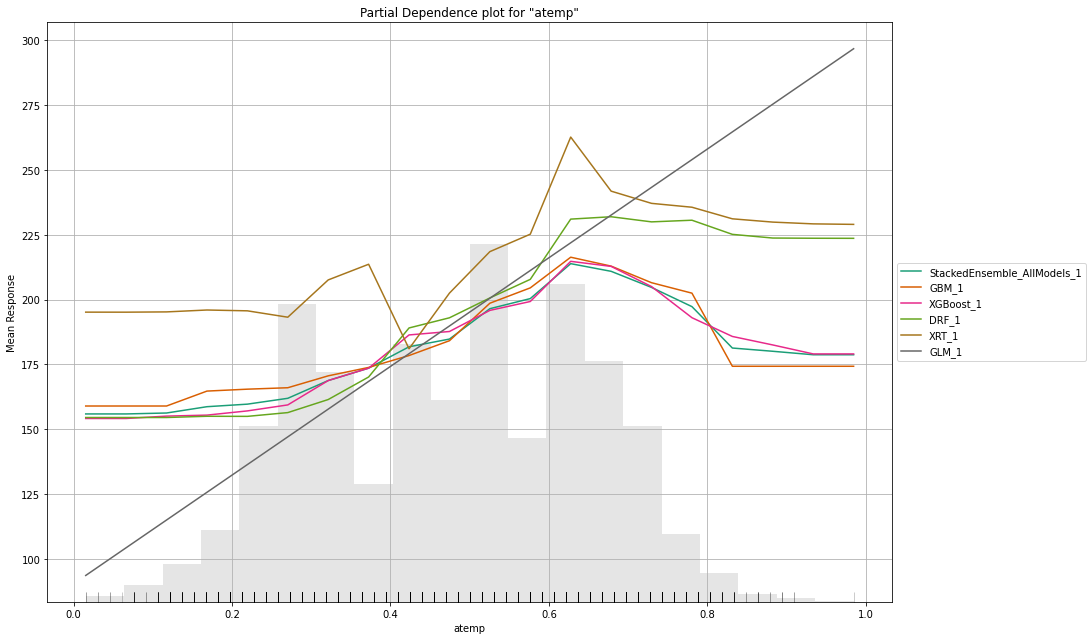

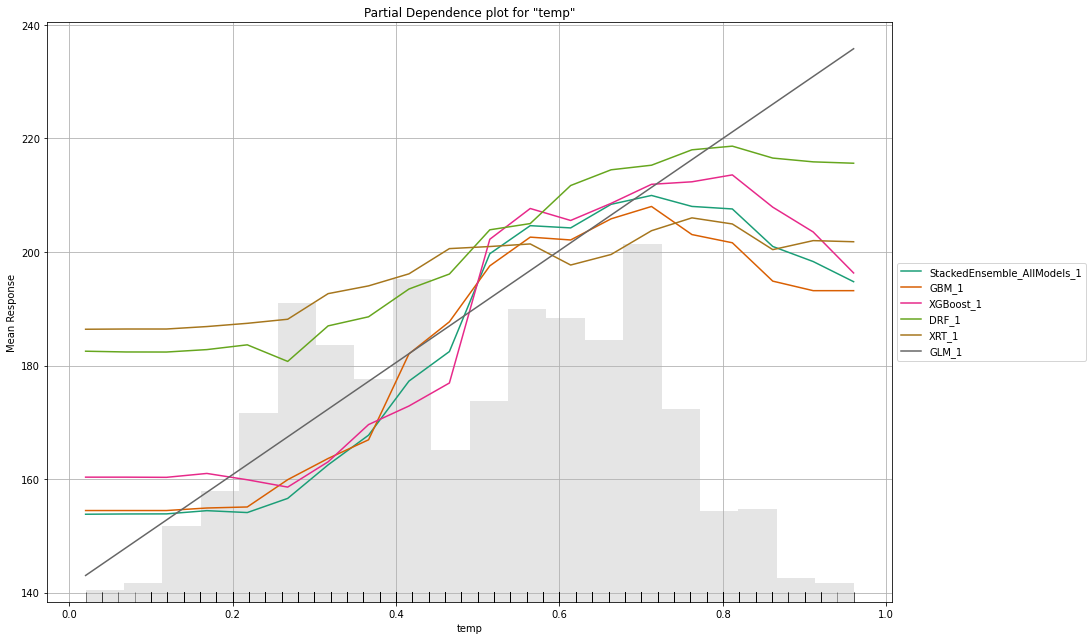

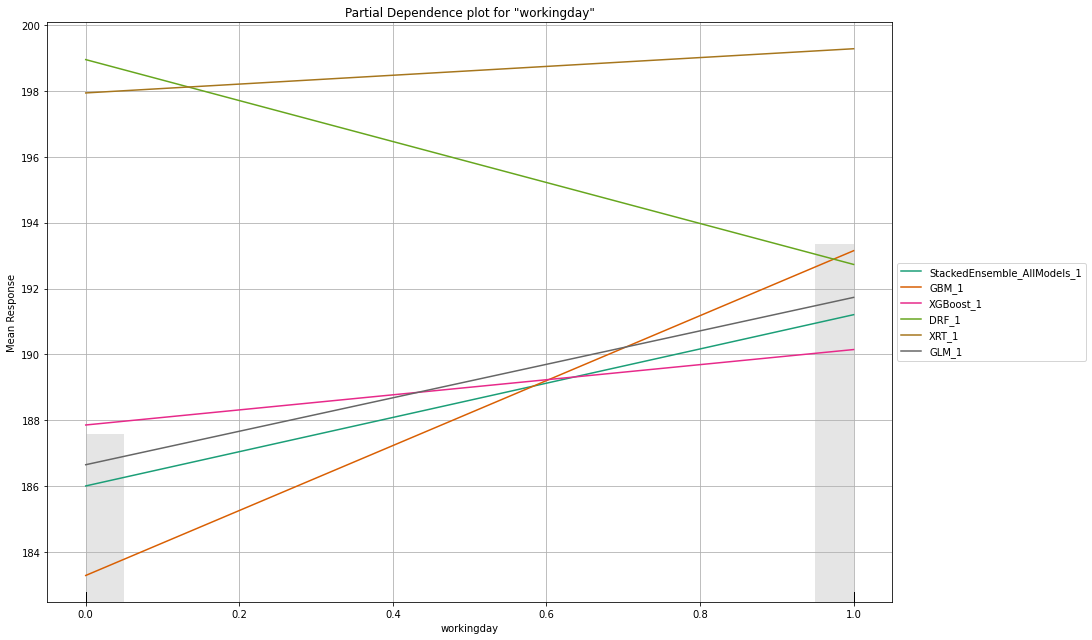

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

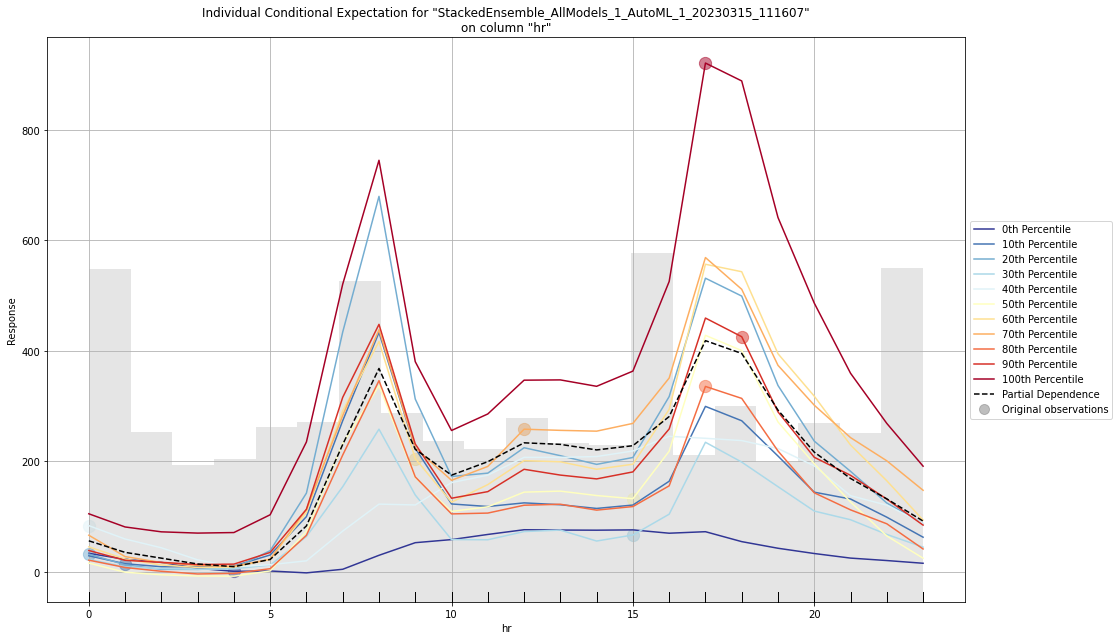

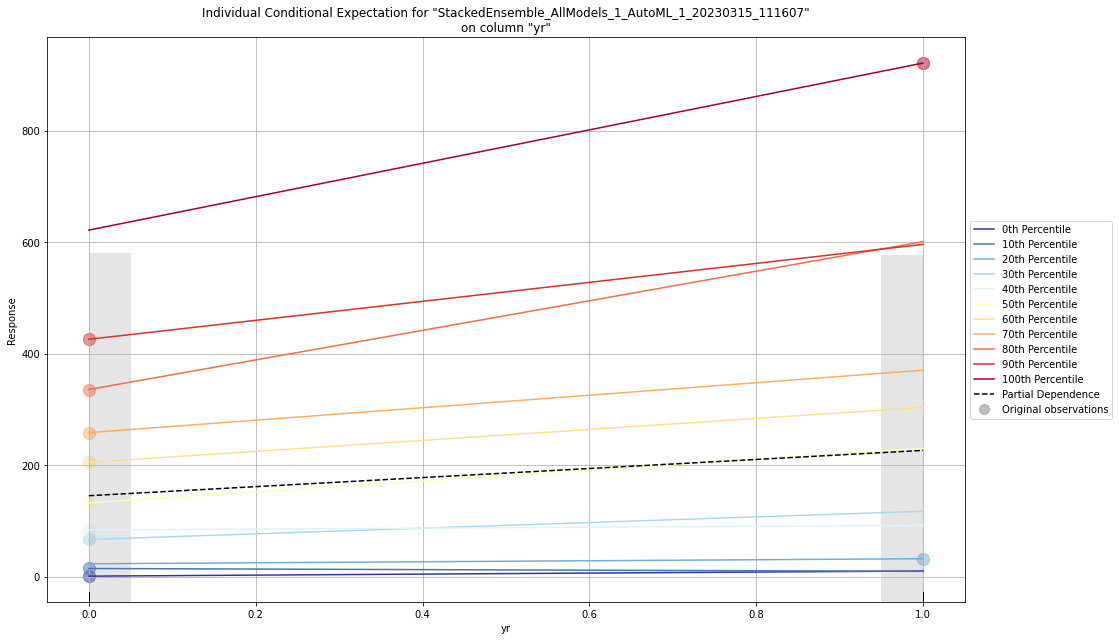

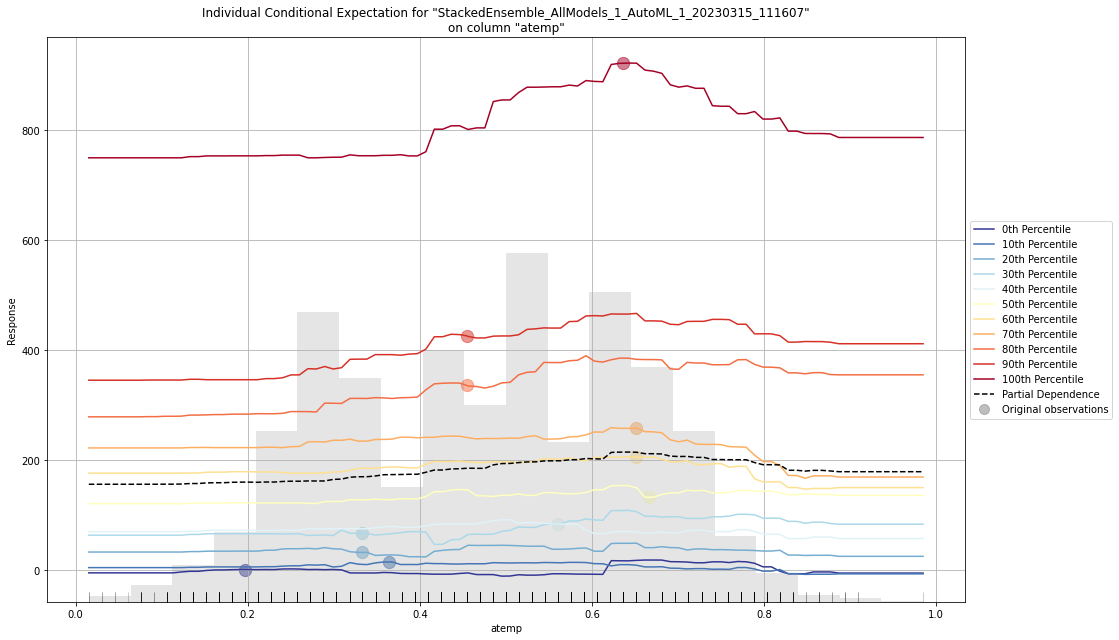

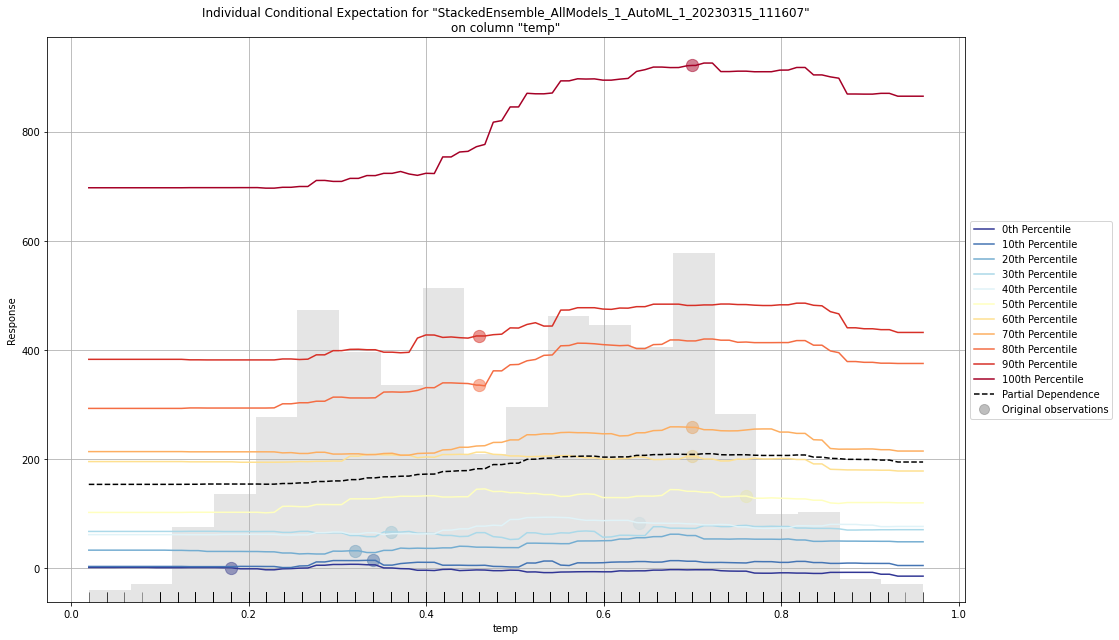

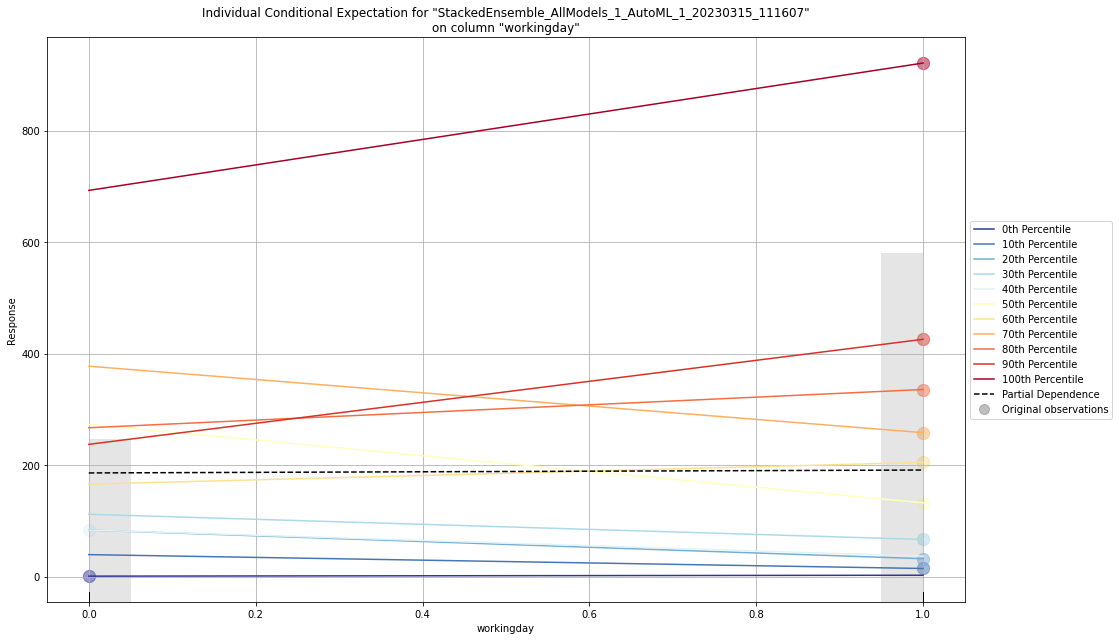

In [5]:
# Explain all AutoML models
exa = aml.explain(test)



In [6]:
# As per above AutoML model explained the different models using XGBOOST,GBM,DRF and Stacked Ensemble models.
## Varible importance and variable importance heat map shows hour has more influence followed year,temperature,working day on the target variable.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

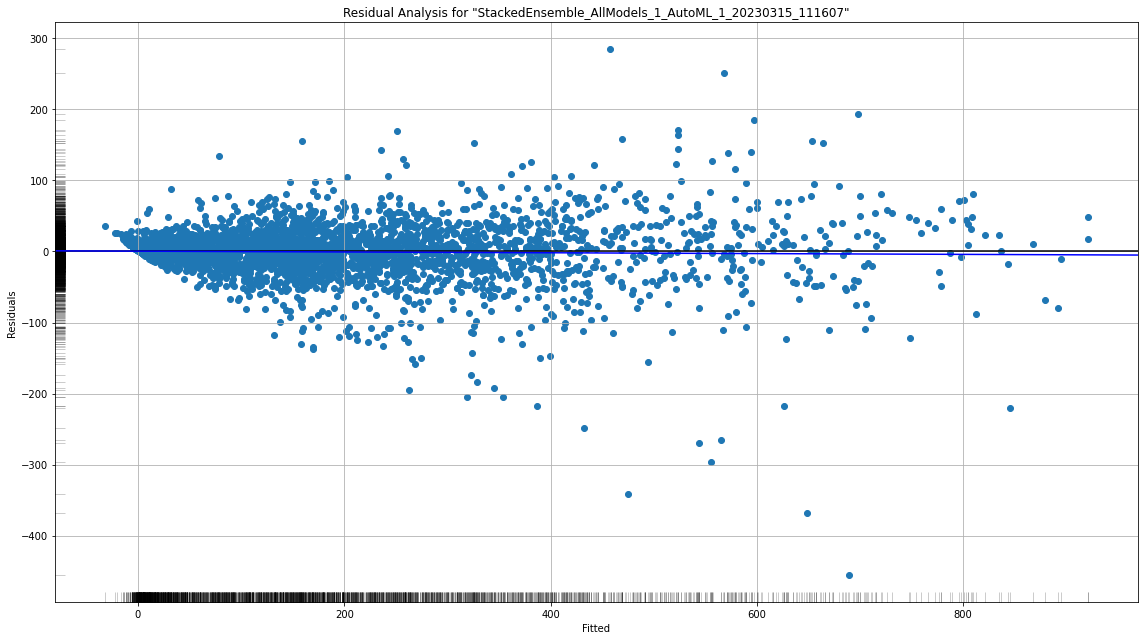

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

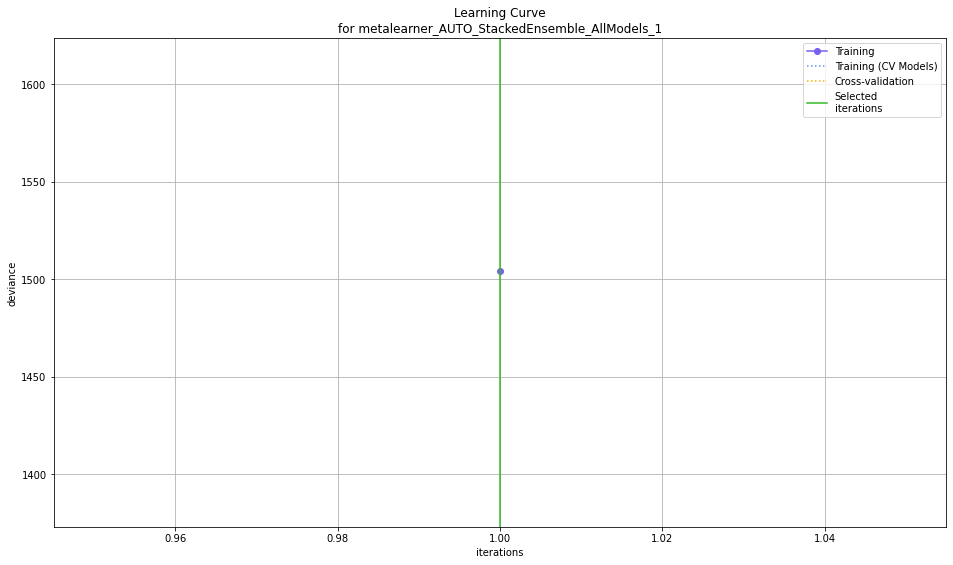

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

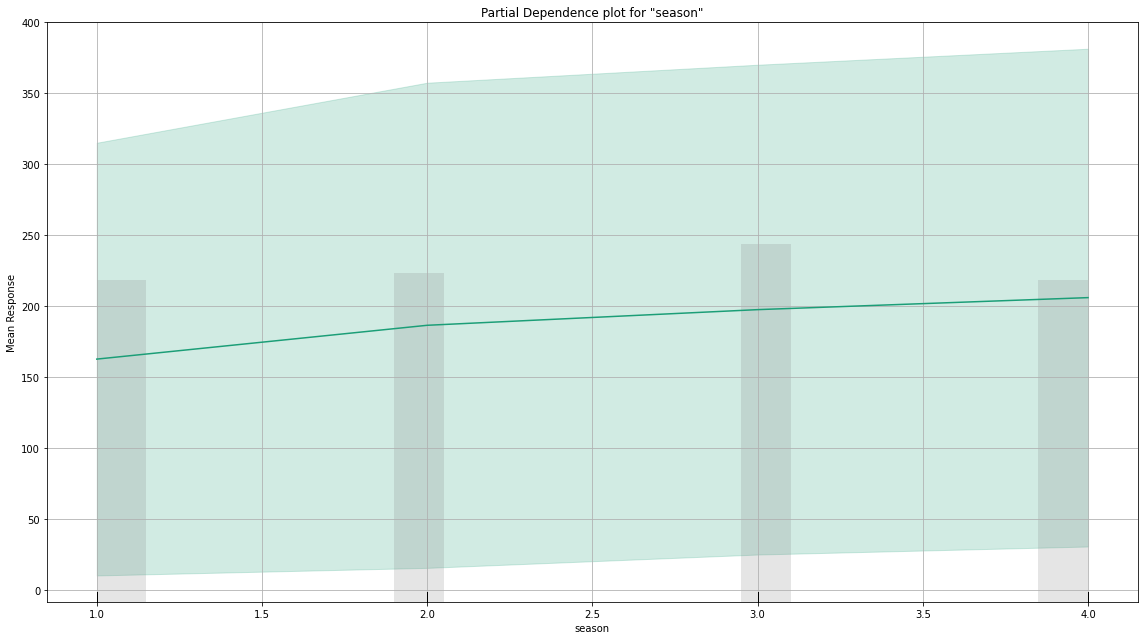

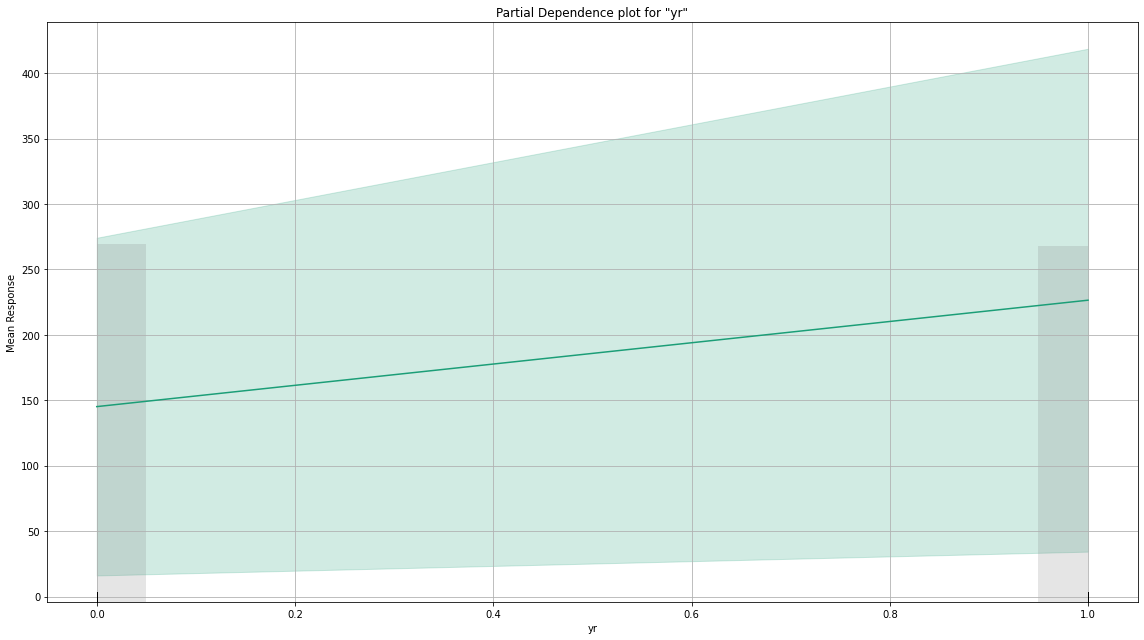

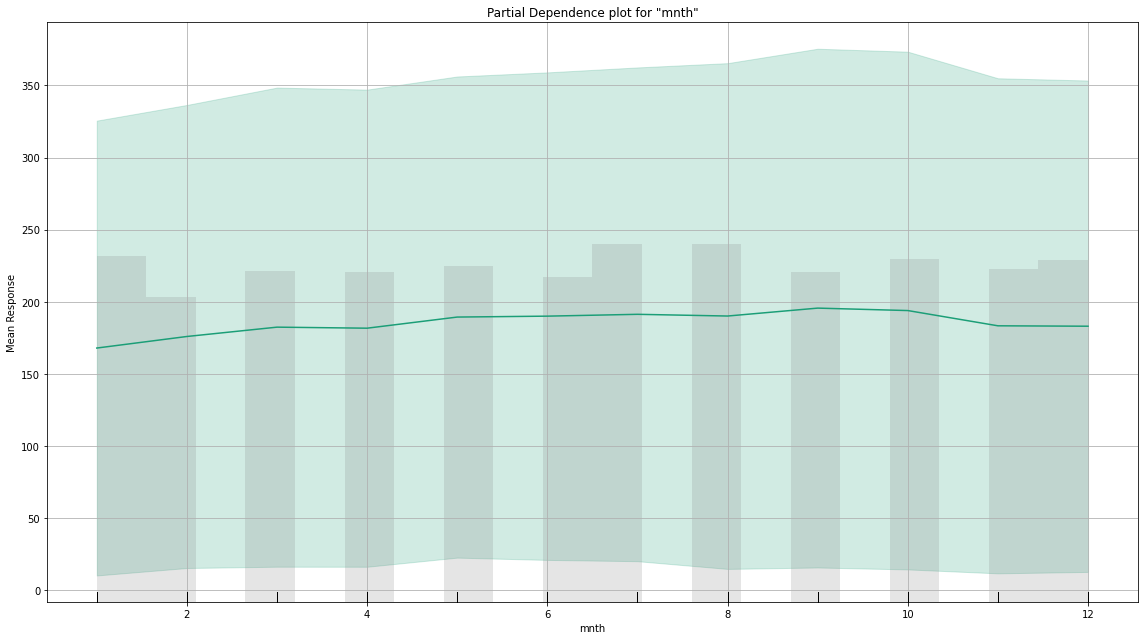

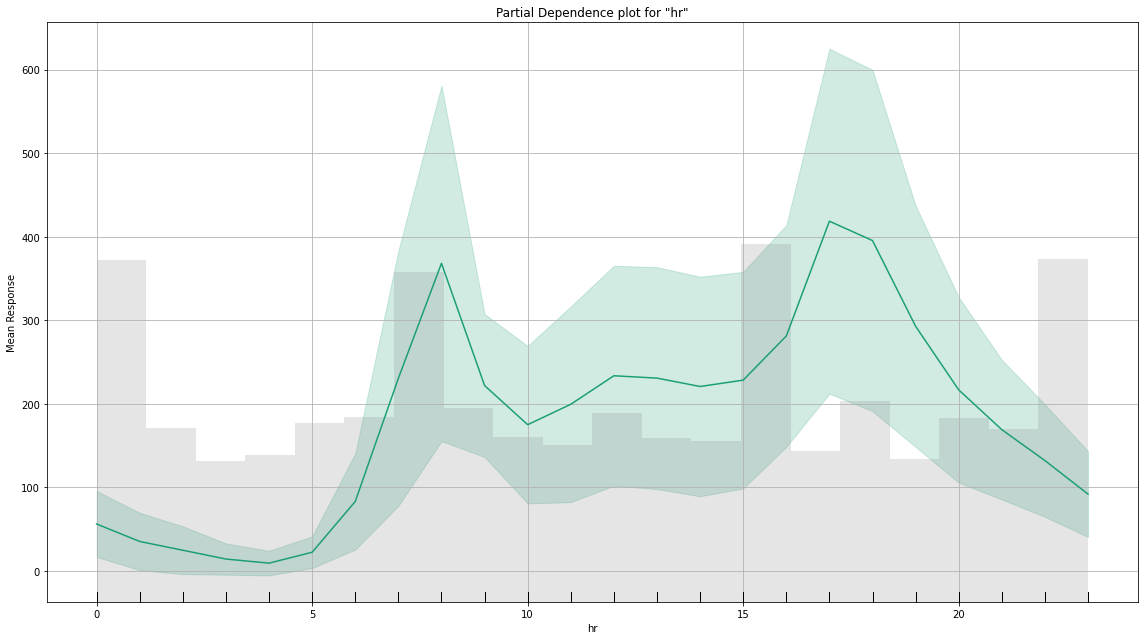

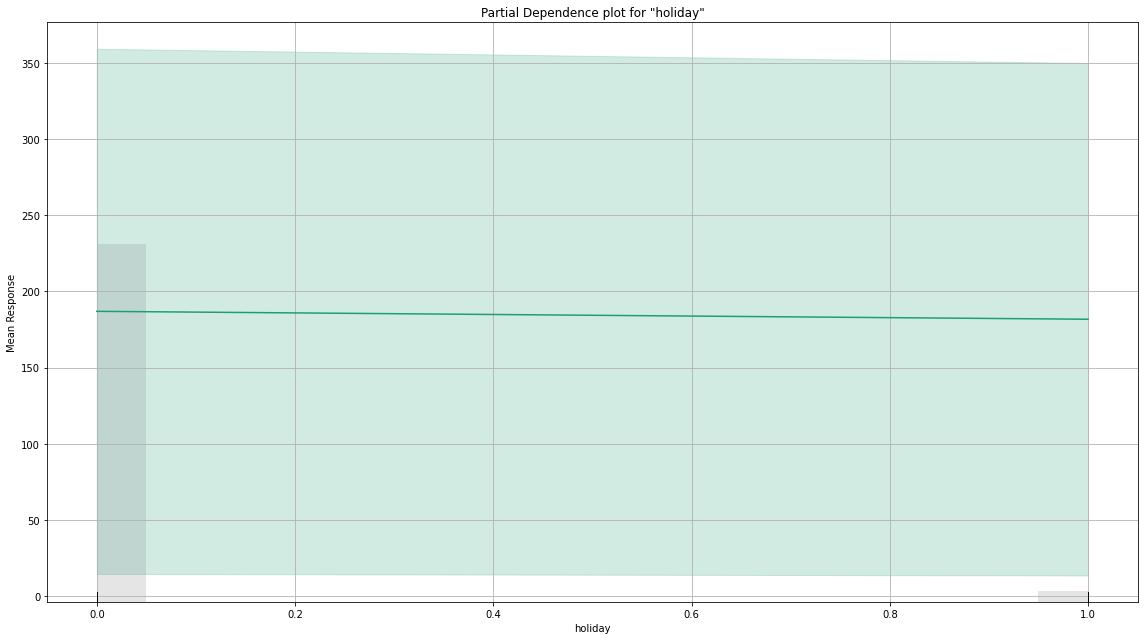

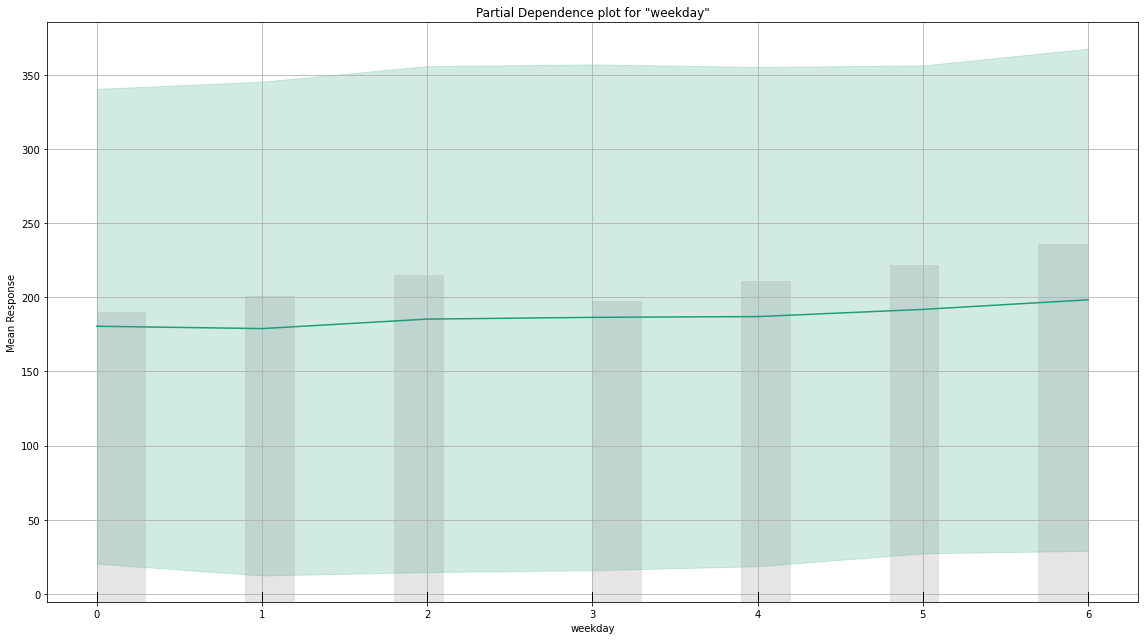

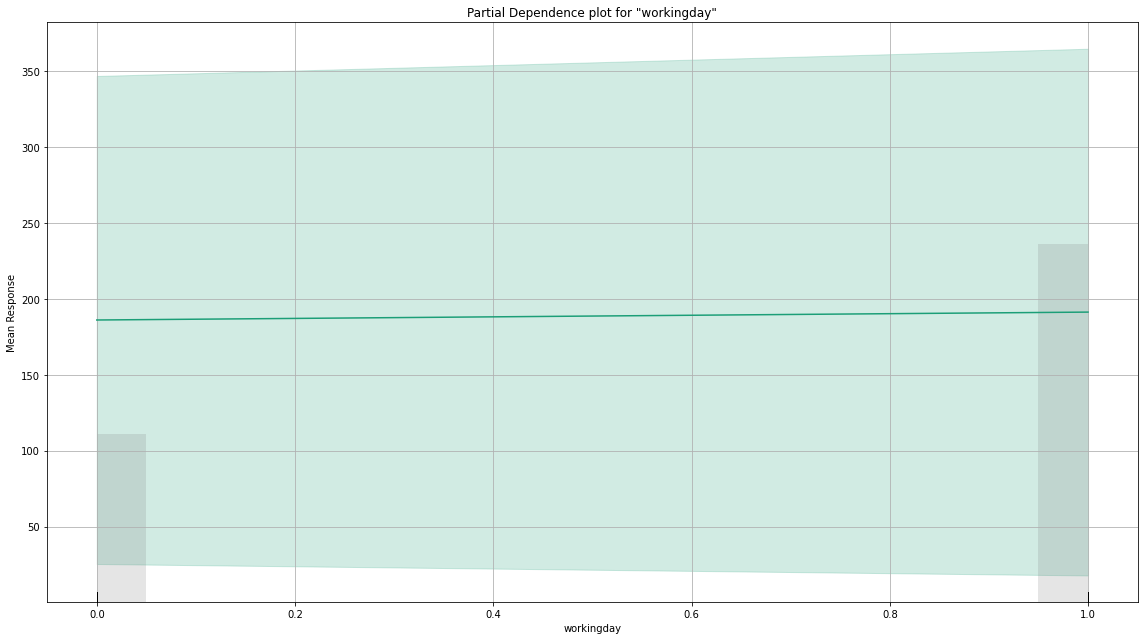

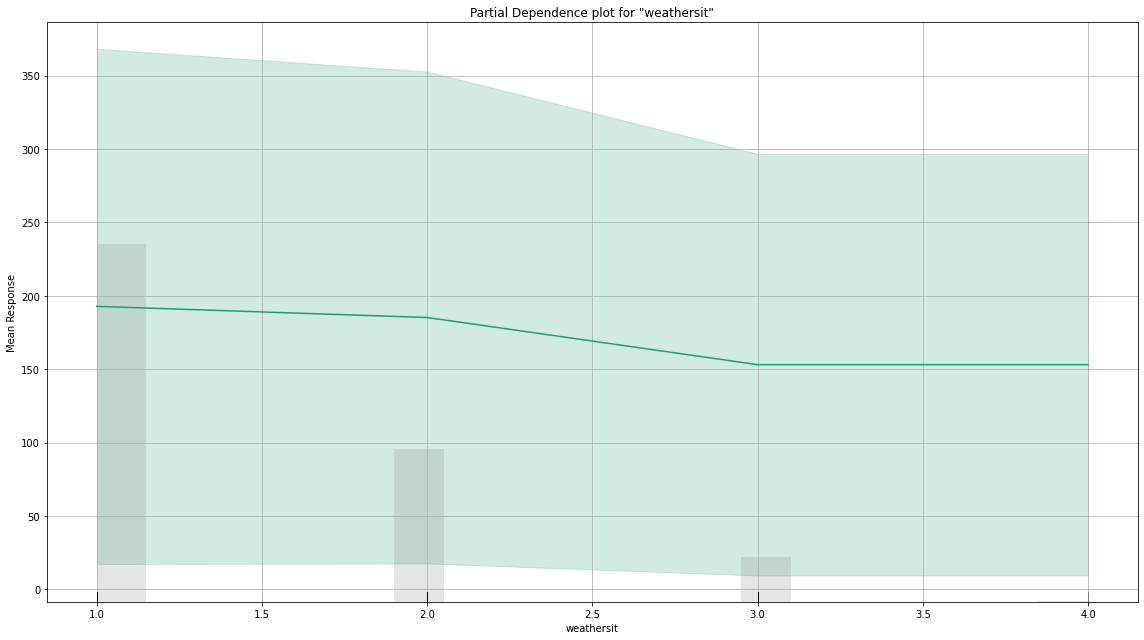

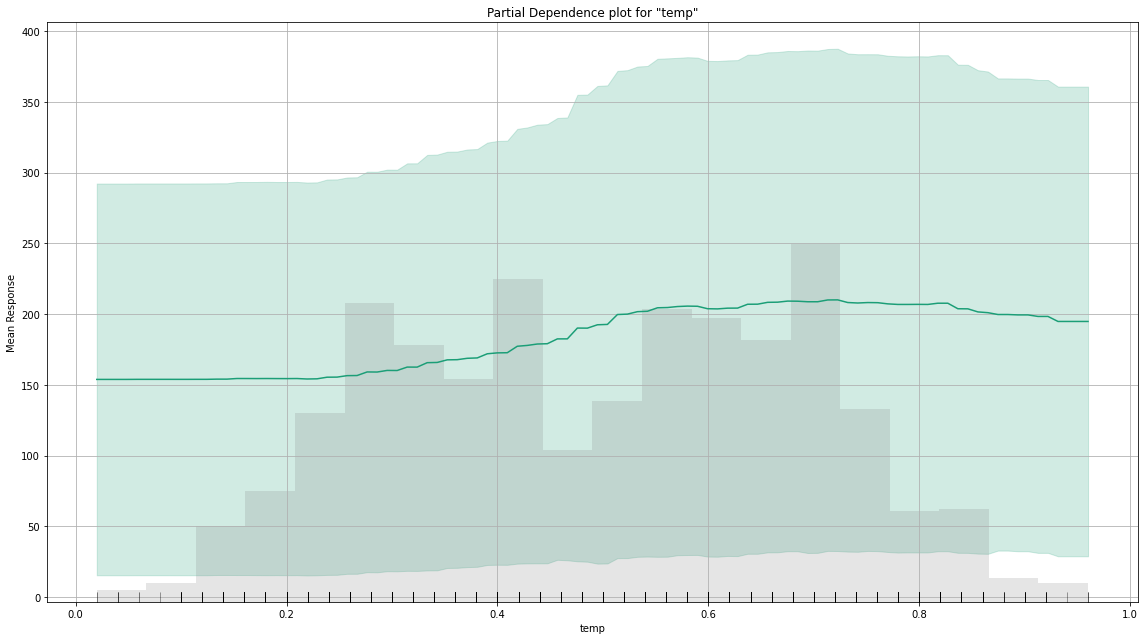

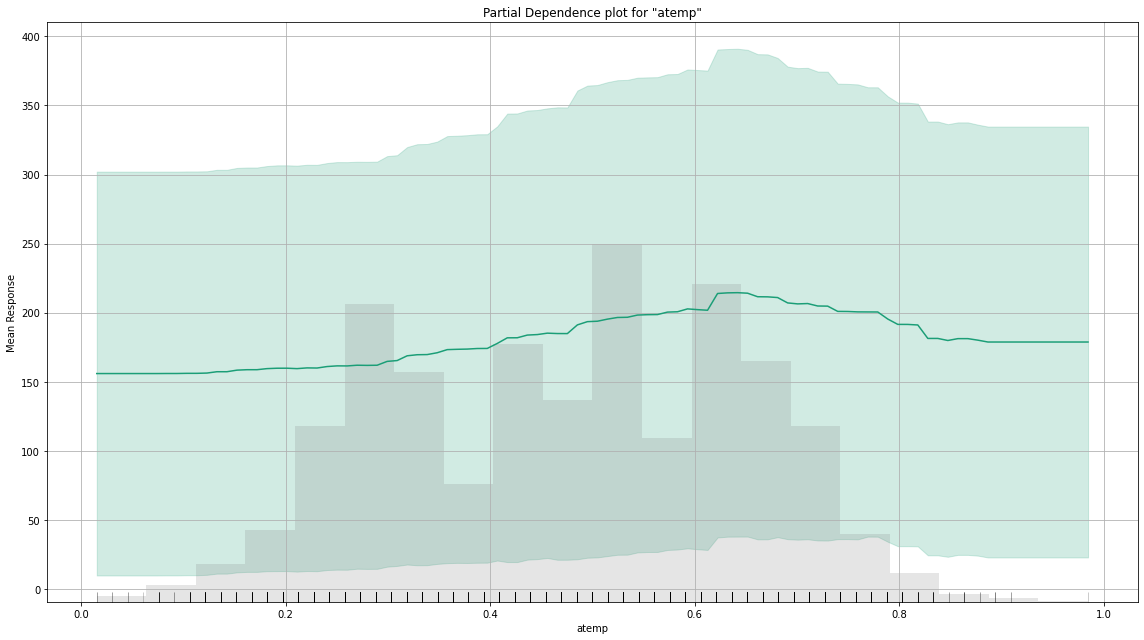

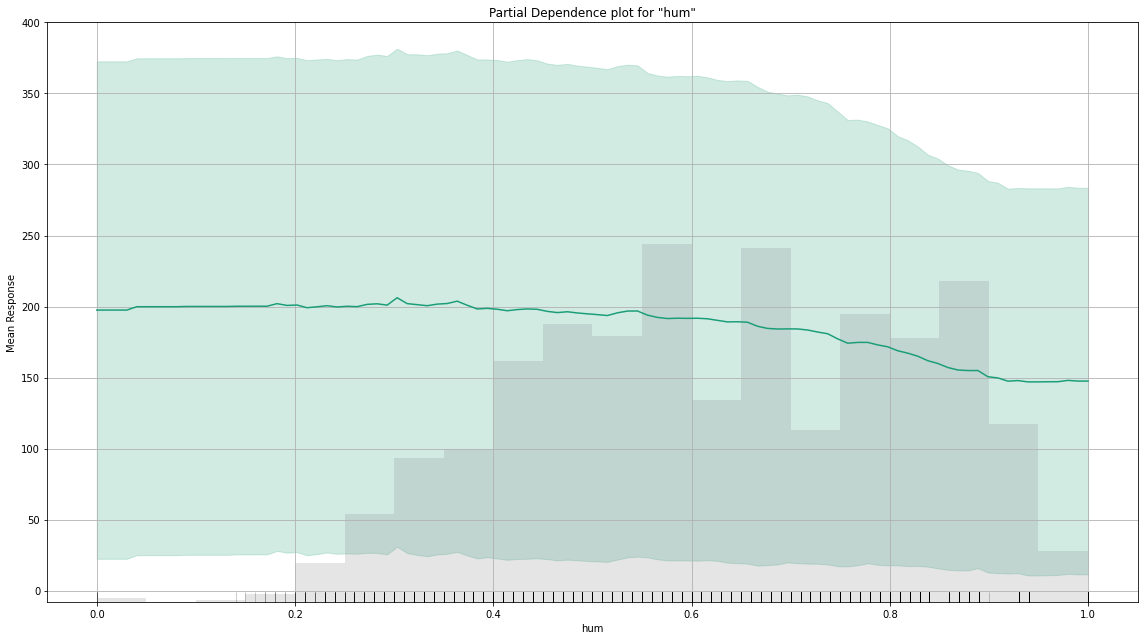

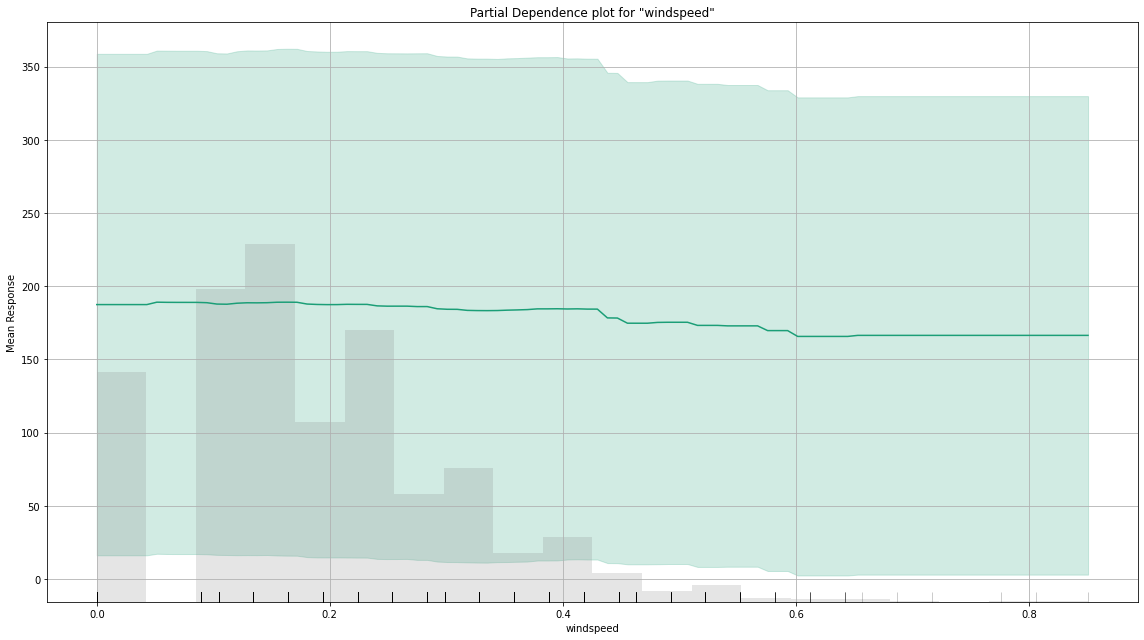

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

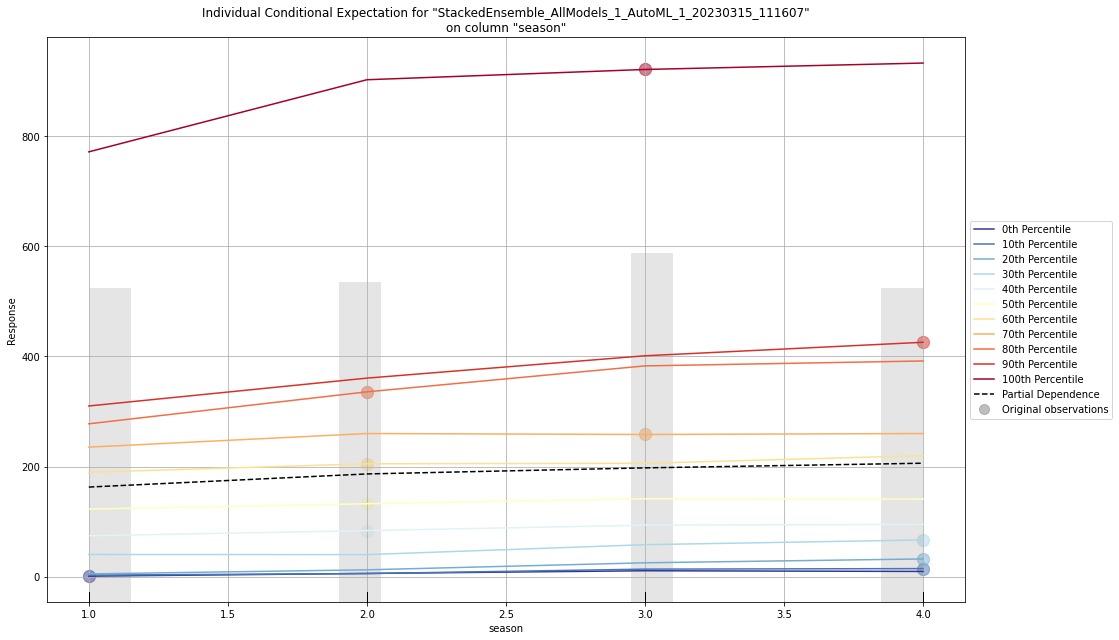

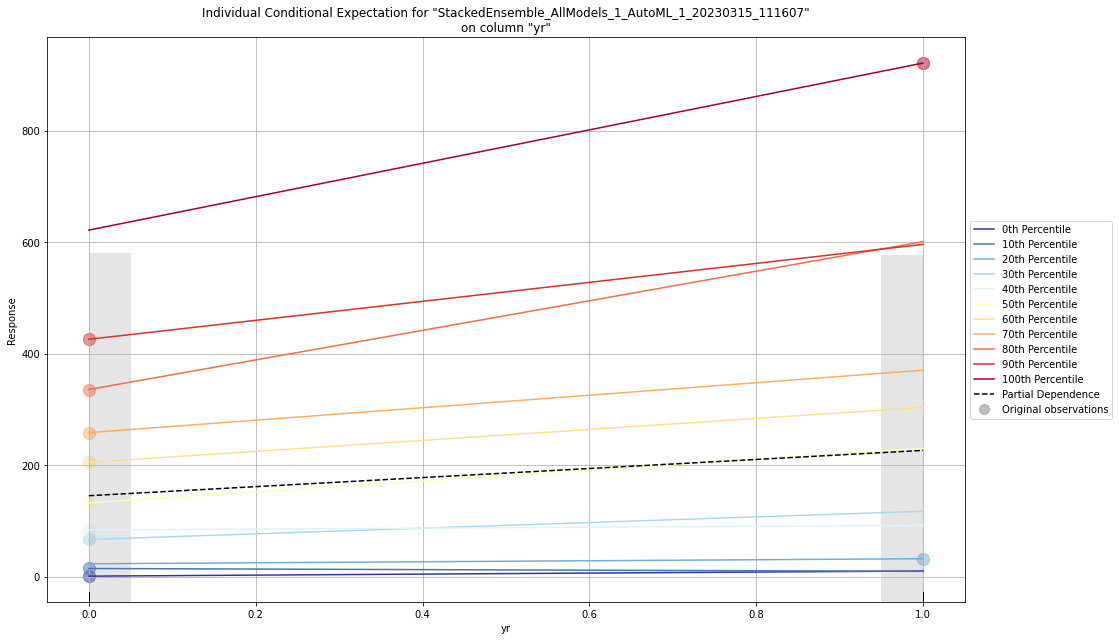

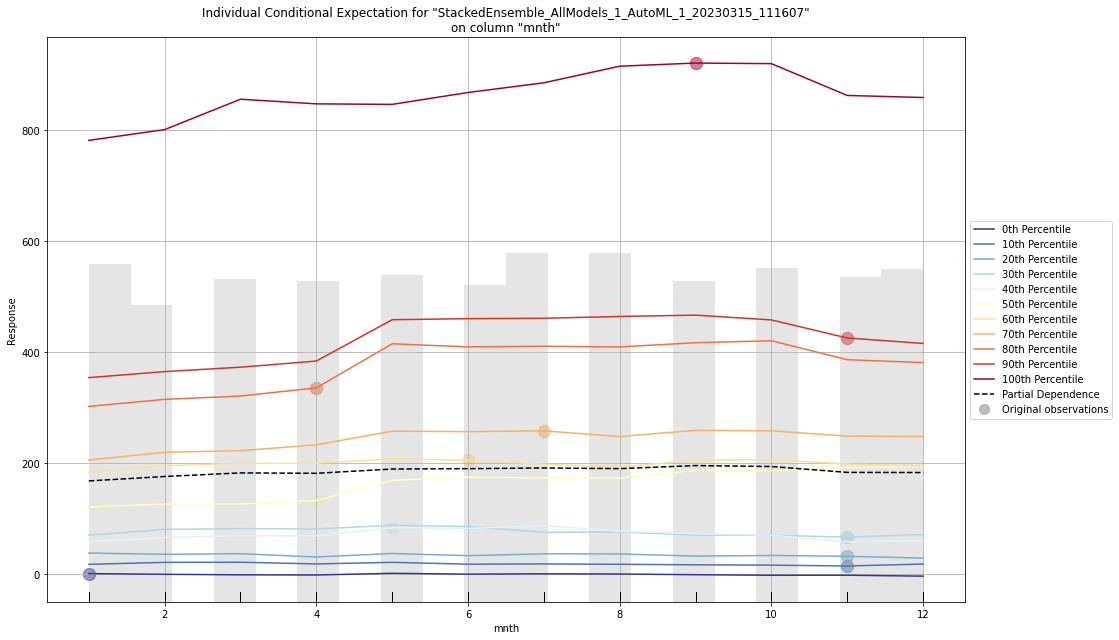

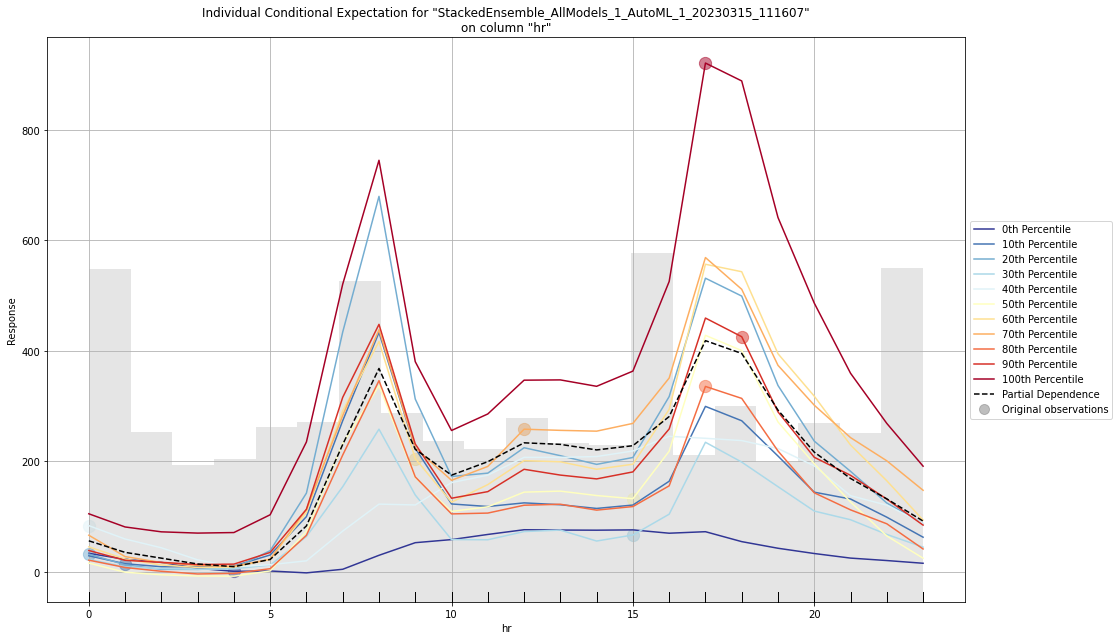

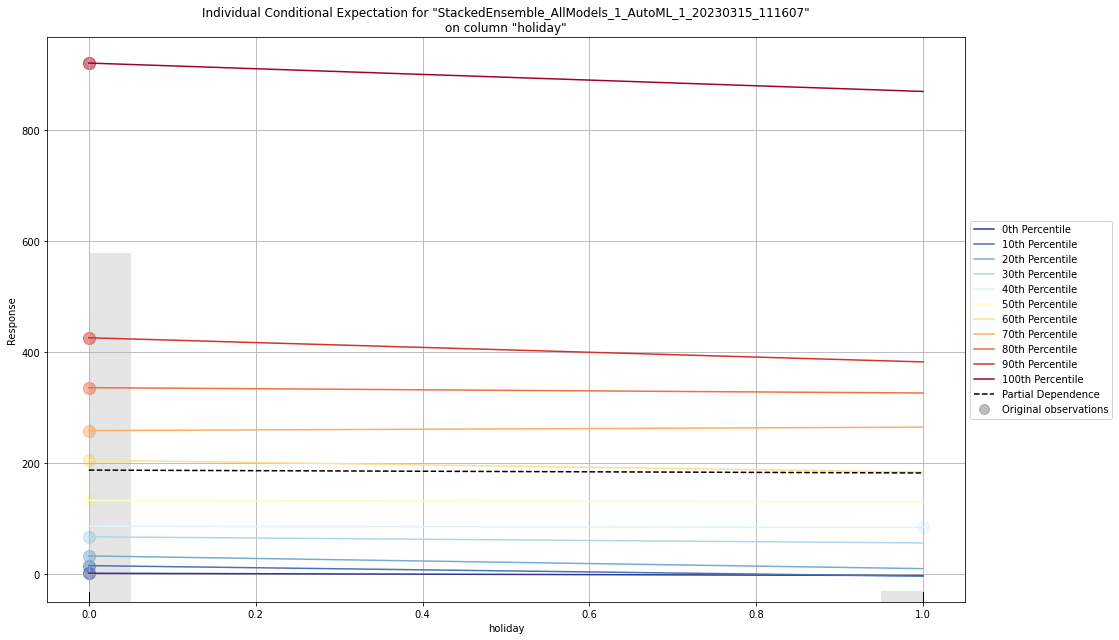

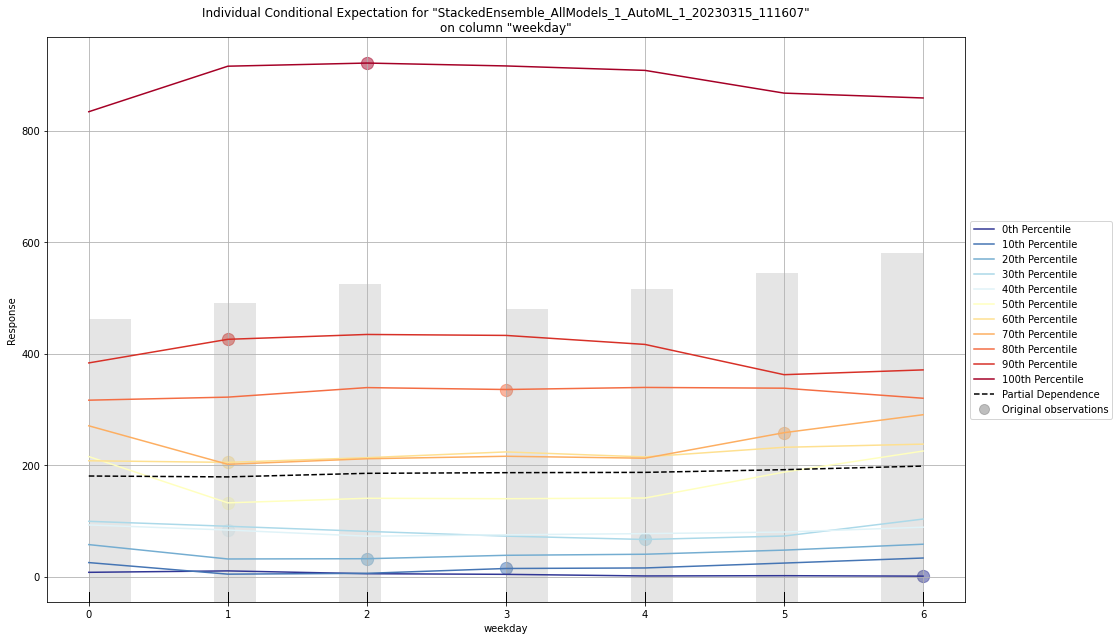

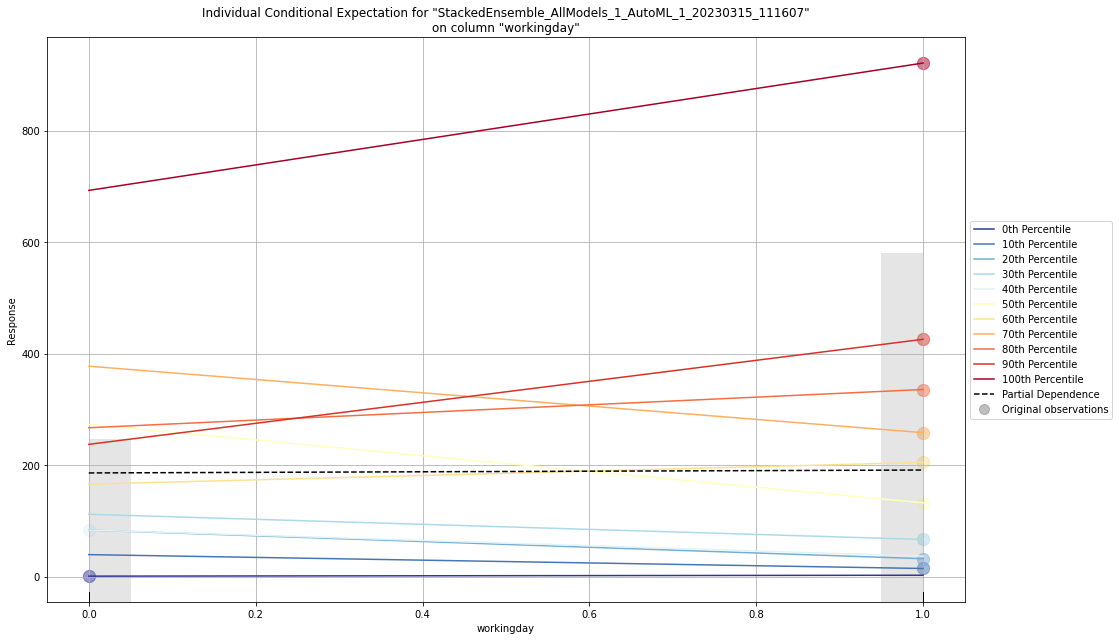

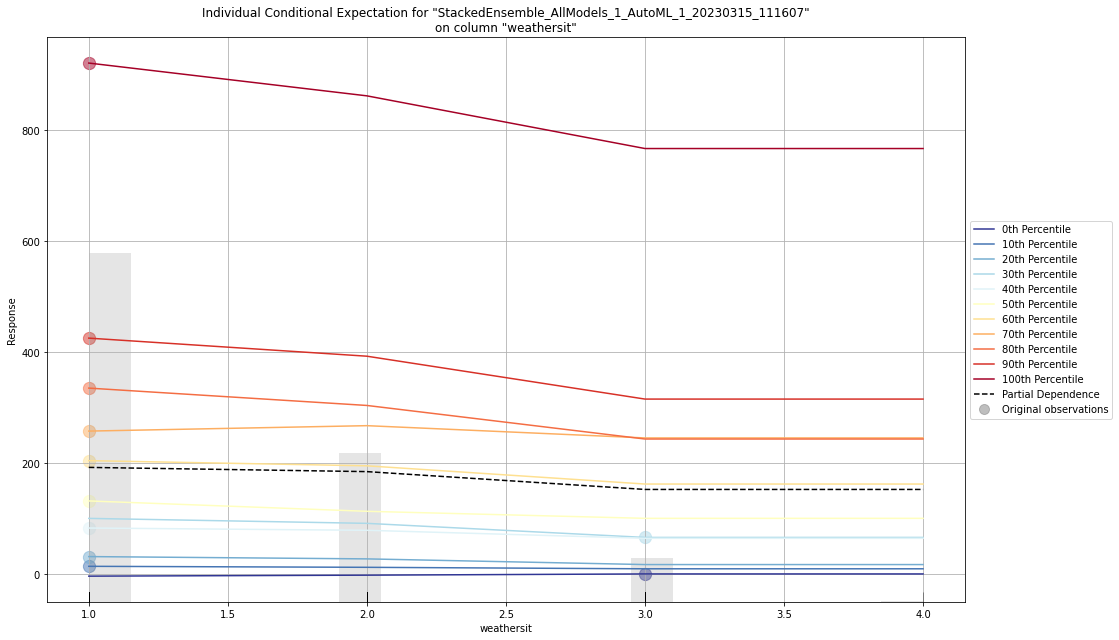

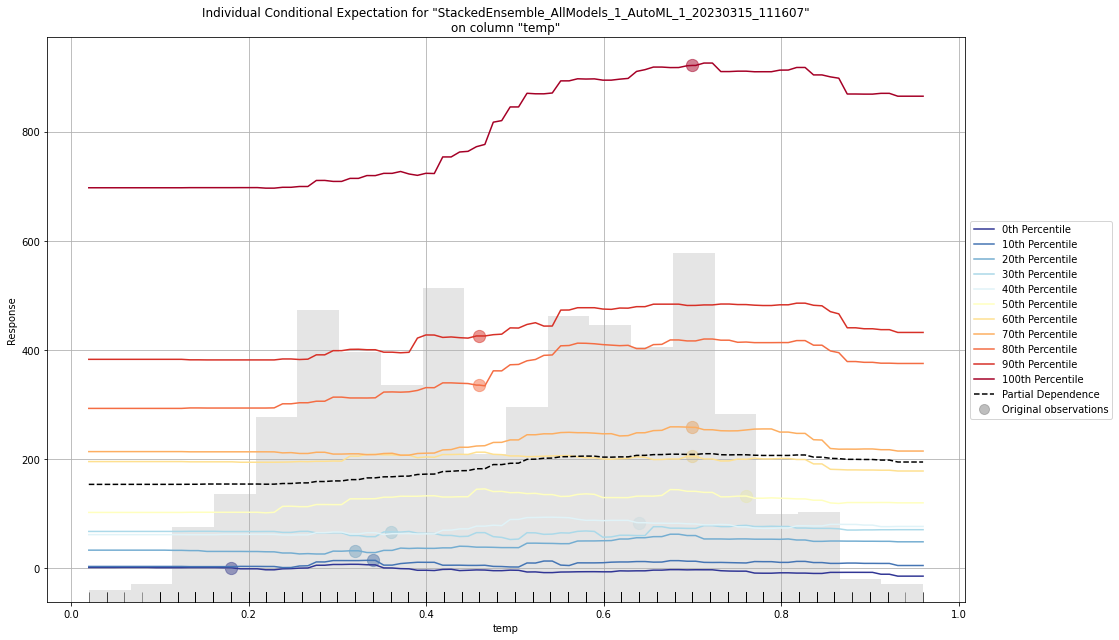

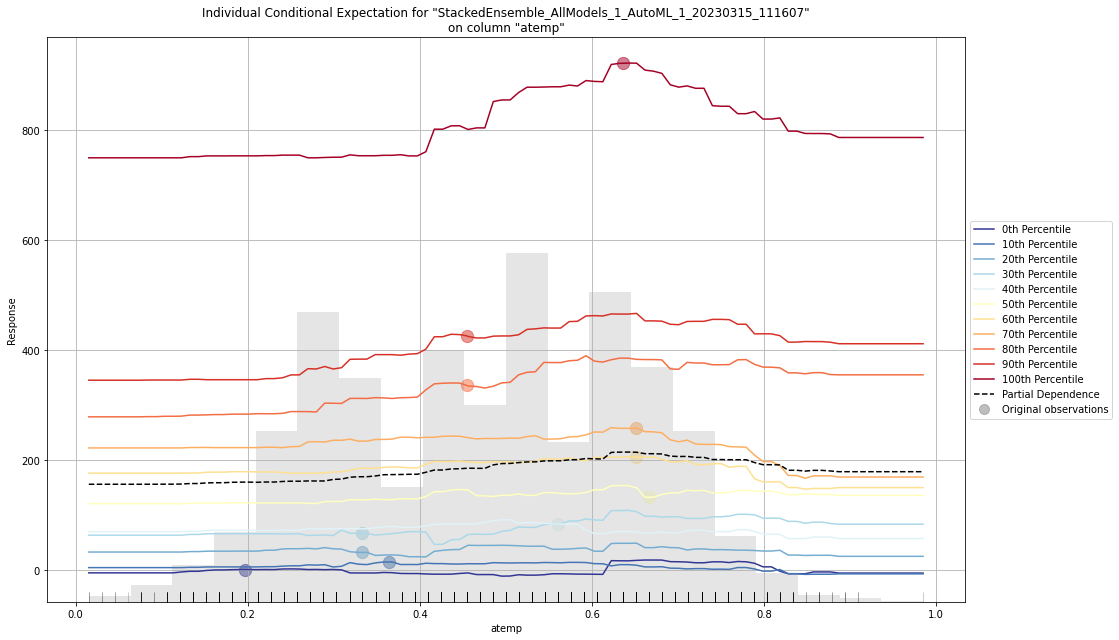

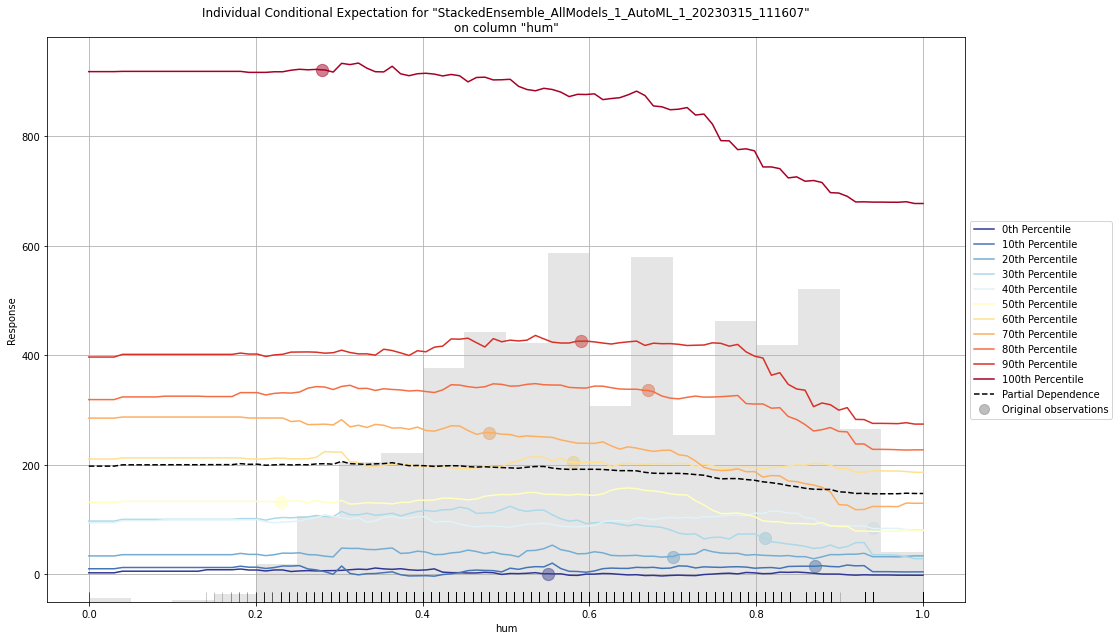

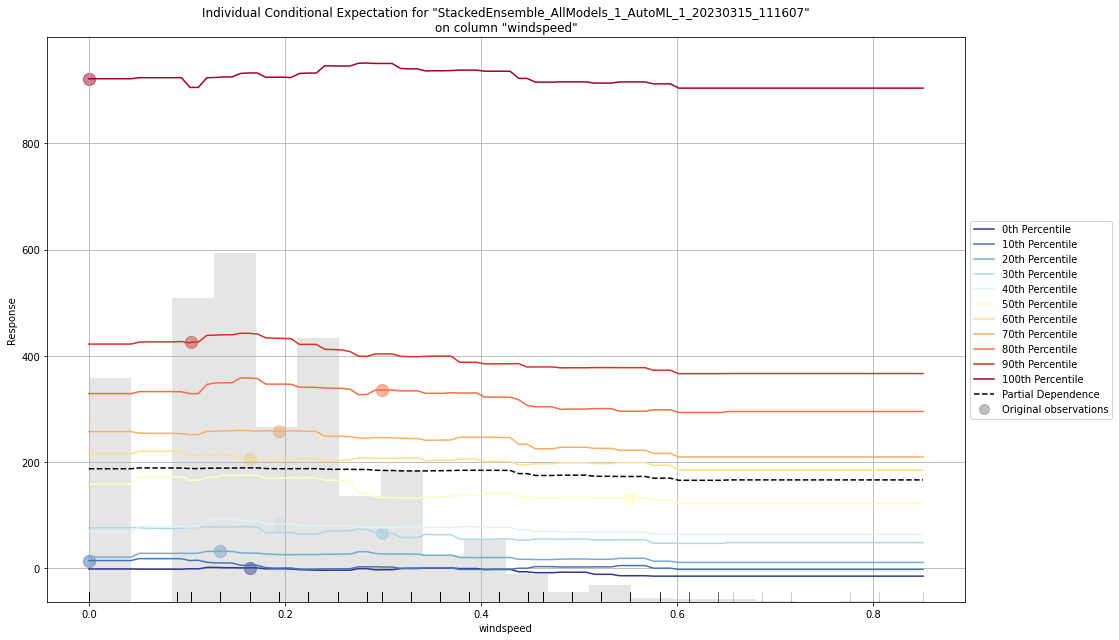

In [7]:
# Explain leader model from AutoML
exm = aml.leader.explain(test)

In [8]:
#As per above stacked ensemble model is the leader model

In [ ]:
%%shell
jupyter nbconvert --to html ///content/explainableAI_hour_H20.ipynb

[NbConvertApp] Converting notebook ///content/explainableAI_hour_H20.ipynb to html
[NbConvertApp] Writing 3835602 bytes to /content/explainableAI_hour_H20.html
